# Assigment 4

# This is a mini-project assignment that includes only programming questions. You are asked to implement optimization algorithms for ML classification problems. 

## Marking of this assignment will be based on the correctness of your ML pipeline and efficiency of your code. 

## Upload your code on Learn dropbox and submit pdfs of the code and to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

In [1]:
# !pip install numpy, scipy, sys

## Suggested way of loading data to python for the assigment. There are alternatives of course, you can use your preferred way if you want.

In [1]:
# Download the LIBSVM package from here: https://www.csie.ntu.edu.tw/~cjlin/libsvm/#download 
# If your download is successfull you should have the folder with name: libsvm-3.24.
# We will use this package to load datasets. 

# Enter the downloaded folder libsvm-3.24 through your terminal. 
# Run make command to compile the package.

# Load this auxiliary package.
import sys
import os
# add here your path to the folder libsvm-3.24/python
path = os.getcwd()+'/libsvm-3.24/python/'

print(os.getcwd())
# Add the path to the Python paths so Python can find the module.
sys.path.append(path)
# sys.path.append(os.getcwd()+'/libsvm-3.24/')
# sys.path.append(os.getcwd()+'/libsvm-3.24/python/')
print(path)


# Load the LIBSVM module.
from svmutil import *

# Add here your path to the folder libsvm-3.24
path = './libsvm-3.24/heart_scale'

# Test that it works. This will load the data "heart_scale" 
# and it will store the labels in "b" and the data matrix in "A".
b, A = svm_read_problem(path)

# Use "svm_read_problem" function to load data for your assignment.

# Note that matrix "A" stores the data in a sparse format. 
# In particular matrix "A" is a list of dictionaries. 
# The length of the list gives you the number of samples.
# Each entry in the list is a dictionary. The keys of the dictionary are the non-zero features.
# The values of the dictionary for each key is a list which gives you the feature value.


/Users/DaHuang/Desktop/CS794/A4
/Users/DaHuang/Desktop/CS794/A4/libsvm-3.24/python/


## Load other useful modules

In [10]:
# Numpy is useful for handling arrays and matrices.
import numpy as np


import matplotlib.pyplot as plt


# my import 
from numpy.linalg import norm
import math,random,time, random
from scipy import real, ndimage
from scipy.sparse import *

from scipy.sparse import *
from sklearn.feature_extraction import DictVectorizer

from  scipy.sparse.linalg import expm





## Datasets that you will need for this assignment.

In [11]:
# There is an extended selection of classification and regression datasets 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

# Out of all these datasets you will need the following 3 datasets, which are datasets for classification problems.
# 
# a9a dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#a9a 
# This dataset is small, it is recommened to start your experiments with this dataset.
#
# epsilon dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#epsilon 
# This dataset relatively large, but most importantly it is ill-conditioned. This means that the
# methods might stagnate fast.
#
# kdd2010 (algebra): https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#kdd2010%20(algebra)
# This dataset is large and very sparse. Exploit the sparsity of the problem when you implement optimization methods.

## Training, Validation and Testing data

In [12]:
# All datasets above consist of training and testing data. 

# You should seperate the training data into training and validation data.
# Follow the instructions from the lectures about how you can use both training and validation data.
# You can use 10% of the training data as validation data and the remaining 90% to train the models.
# This is a suggested percentage, you can do otherwise if you wish.

# Do not use the testing data to influence training in any way. Do not use the testing data at all.
# Only your instructor and TA will use the testing data to measure generalization error. 
# If you do use the testing data to tune parameters or for training of the algorithms we will figure it out :-). 

## Optimization problems

### You need to solve the following optimization problems 

Hinge-loss
$$\mbox{minimize}_{x\in\mathbb{R}^d, \beta \in \mathbb{R}} \ \frac{1}{n} \sum_{i=1}^n \max \{0,1-b_i(a_i^Tx + \beta)\},$$
where $a_i\in\mathbb{R}^d$ is the feature vector for sample $i$ and $b_i$ is the label of sample $i$. The sub-gradient of the hinge-loss is given in the lecture slides (note that there is a small difference due to the intercept $\beta$). A smooth approximation of the function $f(z):=\max\{0,1-z\}$ is given by
$$
\psi_\mu(z) = 
\begin{cases}
0 & z\ge 1\\
(1-z)^2 & \mu < z < 1 \\
(1-\mu)^2 + 2(1-\mu)(\mu-z) & z \le \mu.
\end{cases}
$$
You can use the smooth approximation $\psi_\mu(z)$ for methods that work only for smooth functions. For sub-gradient methods you should use the sub-gradient.

L2-regularized logistic regression
$$\mbox{minimize}_{x\in\mathbb{R}^d,\beta\in\mathbb{R}} \ \lambda \|x\|_2^2 + \frac{1}{n} \sum_{i=1}^n \log (1+ \exp(-b_i(a_i^Tx + \beta))).$$
This is a smooth objective function, therefore, you should use gradient methods to solve it. You do not need sub-gradient methods for this problem.

## Optimization algorithms

In [13]:
# For this assignment you will need the following methods

# 1) Stochastic sub-gradient
# 2) Stochastic gradient
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
# 4) Stochastic average sub-gradient (SAG)
# 5) Stochastic average gradient (SAG)
# 6) Gradient descent with Armijo line-search
# 7) Acceleratd gradient with Armijo line-search (the same method as Q5 in Assignemnt 3)

# Information is provided in the lecture slides about parameter tuning and termination.
# However, the final decision of any parameter tuning and termination criteria is up to the students to make. 

## Validation error: measure the validation error by calculating
$$
\frac{1}{t}\sum_{i\in\mbox{validation data}} \left| \ b_i^{\mbox{your model}} - b_i^{\mbox{true}} \ \right|
$$
where $t$ is the number of samples in your validation set. $b_i^{\mbox{true}}$ is the true label of the $i$-th sample. $b_i^{\mbox{your model}}$ is the label of the $i$-th sample of your model.

For hinge loss calculate $$b_i^{\mbox{your model}}:= \mbox{sign}(a_i^Tx + \beta).$$

For logistic regression calculate the predicted label by
$$
b_i^{\mbox{your model}}=
\begin{cases}
1 & \mbox{if } \frac{1}{1+e^{-(a_i^Tx + \beta)}} > 0.5\\
-1 & \mbox{otherwise}
\end{cases}
$$

## Question 1: Use the ML pipeline that is mentioned in slide 60 of Lecture 11 to train your model for the logistic regression problem (the hinge-loss problem does not have any hyper-parameters). Pick any algorithm that you want from the above suggested list to train the models. Report your ML pipeline. Print your Generalization Error. We will not measure running time for this pipeline. Running time will be measure only in Q2. Marks: 30.

## Question 2: Plot the objective function (y-axis) vs running time in sec (x-axis). Have one plot for each optimization problem. In each plot show the performance of all relevant algorithms. For each plot use the parameter setting that gives you the best validation error in Q1 (this refers to the logistic regression probelm). Do not show plots for all parameter settings that you tried in Q1, only for the one that gives you the smallest validation error. Do not include computation of any plot data in the computation of the running time of the algorithm, unless the plot data are computed by the algorithm anyway. Make sure that the plots are clean and use appropriate legends. Note that we should be able to re-run the code and obtain the plots. Marks: 70.

### For this question, we will measure the running time of your stochastic sub-gradient method for the sparse dataset news20.binary for the hinge-loss problem. We will not measure the running time of any other combination of algorithm, dataset, problem. You need to implement the stochastic sub-gradient method and encapsulate it in a python class.

To make sure your object can be used by our script, your class should have two methods:

1. <strong>fit(self, train_data, train_label)</strong>. It will use stochastic sub-gradient method to minimize the hinge loss and store the optimized coefficients (i.e. $x, \beta$) in the instance. The "train_data" and "train_label" are similar to the output of "svm_read_problem". 
    * "train_data" is a list of $n$ python dictionaries (int -> float), which presents a sparse matrix. The keys (int) and values (float) in the dictionary at train_data[i] are the indices (int) and values (float) of non-zero entries of row $i$. 
    * "train_label" is a list of $n$ integers, it only has <strong>-1s and 1s</strong>. $n$ is the number of samples.  This function returns nothing.


2. <strong>predict(self, test_data)</strong>. It will predict the label of the input "test_data" by using the coefficients stored in the instance. The "test_data" has the same data structure as the "train_data" of the "fit" function. This function returns a list of <strong>-1s and 1s</strong> (i.e. the prediction of your labels).

You can also define other methods to help your programming, we will only call the two methods decribed above.

To let us import your class, you need to follow these rules:

1. You should name your python file by <strong>a4_[your student ID].py</strong>. For example, if your student id is 12345, then your file name is <strong>a4_12345.py</strong>
1. Your object name should be <strong>MyMethod</strong> (it's case sensitive).

Any violation of the above requirements will get error in our script and you will get at most 50% of the total score. Your solution will be mainly measured by the runing time of the <strong>fit</strong> function and the accuracy of the <strong>predict</strong> function. For example your method will be called and measured in following pattern:

    obj = MyMethod()
    st = time.time()
    obj.fit(train_data, train_label) # .fit() optimizes the objective and stores coefficients in obj.
    running_time = time.time() - st
    predict_label = obj.predict(test_data)
    accuracy = get_accuracy(predict_label, test_label) # this is a function we use to measure accuracy.
Then your accuracy will be measured by <strong>predict_labels</strong>, you don't have to implement "get_accuracy". When you finish your implementation, upload the .py file to Learn dropbox.

In [14]:
########################################################################
# Q1
########################################################################

# Read from a9a

# A is a list of Dictionary, b is a list of int. 
b,A = svm_read_problem(os.getcwd()+'/a9a')
features = 123
vec = DictVectorizer()
A_matrix = A_matrix = vec.fit_transform(A).tocsr()
b_matrix = csr_matrix(np.array(b).reshape(len(b),1), shape=(len(b),1))

# shuffle matrix
from sklearn.utils import shuffle
A_shuffled, b_shuffled = shuffle(A_matrix,b_matrix)

# Ax+beta = b, adding one column of one to A and append beta to x
A_ = hstack((A_shuffled, csr_matrix(np.ones(shape=(A_shuffled.shape[0],1), dtype=float), shape=(len(b),1)))).tocsr()
x_ = csr_matrix(np.ones(shape=(features+1,1), dtype=float), shape=(features+1,1)) # features +1 = [x+beta]
b_ = b_shuffled

# 90% training and 10% testing
A_training = A_[:int(0.9*A_.shape[0])]
b_training = b_[:int(0.9*b_.shape[0])]
A_testing = A_[int(0.9*A_.shape[0]):]
b_testing = b_[int(0.9*b_.shape[0]):]

In [17]:

# help functions
# A_matrix is scipy.sparse.csr_matrix, x is scipy.sparse.csr.csr_matrix, b is numpy.ndarray 
import random
lambda_ = 1
def get_hinge_loss(A,x,b):
    A_dot_x = A.dot(x)
    ei = A_dot_x.multiply(b).tocsr()  # scipy.sparse.coo.coo_matrix ->csr a matrix 
    one_error = lambda ei : max(0,1-ei)
    total_error = sum(map(one_error,[ei[i,0] for i in range(ei.shape[0])]))
    return total_error/A.shape[0]

# get_hinge_loss(A_,x_,b_)
    
    
# return a csr_matrix (row vector)
def get_gradient(A,x,b,i):
#     print('get_gradient')
    if 1 - (b[i]*(A[i].dot(x))).tocsr()[0,0] > 0:
        grad = (-b[i]*A[i]).reshape(features+1,1).tocsr()
        return grad
    else: 
        grad = csr_matrix(np.zeros(shape=(features+1,1), dtype=float))
        return grad
# get_gradient(A_,x_,b_,10)        
        
def stochastic_subgradient(A,x,b,max_iteration,epsilon):
    count = 2 # decrease by 1/log(count), denominator cant be zero
    print('stochastic_subgradient')
    hinge_loss = epsilon # initial a size to start 
    while count < max_iteration and hinge_loss >= epsilon:
        index = random.randint(0,b.shape[0])
        hinge_loss = get_hinge_loss(A,x,b)
        grad = get_gradient(A,x,b,index)
        step_size = 1/math.log(count,2) 
#         print('count %d\t i %d\t stepsize %.4f \t hinge_loss %.4f\t sum_of_grad %d'%(count,index, step_size,hinge_loss, grad.sum()))
        stepsize = 1/math.log(count)
        x = x - step_size*grad
        count +=1
    return x,count,hinge_loss


In [18]:
########################################################################
# Q1 training
########################################################################

x_sgd,count_sgd,hinge_loss_sgd = stochastic_subgradient(A_training,x_,b_training, 1000,0.5)

print(count_sgd,hinge_loss_sgd)

stochastic_subgradient


KeyboardInterrupt: 

In [19]:
########################################################################
# Q1 
########################################################################
# validation error
# print(get_hinge_loss(A_testing,x_sgd,b_testing))

def validation_error_Q1(A,x,b):
    A_dot_x = A.dot(x).tocsr()
    s = A_dot_x.sign()
    return np.sum(np.absolute(s-b))/b.shape[0]
print(validation_error_Q1(A_testing,x_sgd,b_testing))

NameError: name 'x_sgd' is not defined

In [14]:
########################################################################
# Q2 
########################################################################
# 1) Stochastic sub-gradient
def get_hinge_loss(A,x,b):
#     print('get_hinge_loss')
    A_dot_x = A.dot(x)
    ei = A_dot_x.multiply(b).tocsr()  # scipy.sparse.coo.coo_matrix ->csr a matrix 
    one_error = lambda ei : max(0,1-ei)
    total_error = sum(map(one_error,[ei[i,0] for i in range(ei.shape[0])]))
    return total_error/A.shape[0]

def get_gradient_sto_subgrad(A,x,b,i):
#     print('get_gradient')
    if 1 - (b[i]*(A[i].dot(x))).tocsr()[0,0] > 0:
        grad = (-b[i]*A[i]).reshape(features+1,1).tocsr()
        return grad
    else: 
        grad = csr_matrix(np.zeros(shape=(features+1,1), dtype=float))
        return grad
    
def sto_subgrad(A,x,b,max_iteration,epsilon,record_loss):
    count = 2
    print('stochastic_subgradient, question2',)
    loss_list = []
    time_list = []
    st = time.time()
    print(st)
    loss = float('inf') # initial a size to start 
    while count < max_iteration and loss >= epsilon:
        index = random.randint(0,b.shape[0])
        loss = get_hinge_loss(A,x,b)
        grad = get_gradient_sto_subgrad(A,x,b,index)
        step_size = 1/math.log(count,2) 
        
        stepsize = 1/math.log(count)
        x = x - step_size*grad
        time_diff = time.time()-st
        print('count %d\t i %d\t stepsize %.4f \t hinge_loss %.4f\t time %.4f'%(count,index, step_size,loss,time_diff))
        count +=1
        if record_loss:
            loss_list.append(loss)
            time_list.append(time_diff)
    if record_loss:
        return x,count,loss_list,time_list
    return x,count,hinge_loss
x_ssg,count_ssg,loss_ssg, time_ssg= stochastic_subgradient_Q2(A_training,x_,b_training, 1000,0.5,True)


stochastic_subgradient, question2
1573336705.143268
count 2	 i 23798	 stepsize 1.0000 	 hinge_loss 12.0189	 time 0.8955
count 3	 i 4190	 stepsize 0.6309 	 hinge_loss 12.0189	 time 1.7760
count 4	 i 9680	 stepsize 0.5000 	 hinge_loss 12.0189	 time 2.5946
count 5	 i 22304	 stepsize 0.4307 	 hinge_loss 8.9150	 time 3.4085
count 6	 i 28464	 stepsize 0.3869 	 hinge_loss 8.9150	 time 4.2397
count 7	 i 26939	 stepsize 0.3562 	 hinge_loss 6.8849	 time 5.0423
count 8	 i 19652	 stepsize 0.3333 	 hinge_loss 5.2177	 time 5.8494
count 9	 i 13009	 stepsize 0.3155 	 hinge_loss 3.6016	 time 6.6667
count 10	 i 28432	 stepsize 0.3010 	 hinge_loss 1.8043	 time 7.4667
count 11	 i 25732	 stepsize 0.2891 	 hinge_loss 1.8043	 time 8.2671
count 12	 i 845	 stepsize 0.2789 	 hinge_loss 0.8696	 time 9.0833
count 13	 i 19266	 stepsize 0.2702 	 hinge_loss 0.6558	 time 9.8903
count 14	 i 14830	 stepsize 0.2626 	 hinge_loss 0.6558	 time 10.7117
count 15	 i 27106	 stepsize 0.2560 	 hinge_loss 0.6558	 time 11.5439
cou

count 121	 i 13921	 stepsize 0.1445 	 hinge_loss 0.9272	 time 99.0616
count 122	 i 26198	 stepsize 0.1443 	 hinge_loss 0.9272	 time 99.8728
count 123	 i 15381	 stepsize 0.1440 	 hinge_loss 0.9272	 time 100.6977
count 124	 i 17291	 stepsize 0.1438 	 hinge_loss 0.9272	 time 101.5134
count 125	 i 28145	 stepsize 0.1436 	 hinge_loss 0.9272	 time 102.2961
count 126	 i 8663	 stepsize 0.1433 	 hinge_loss 0.7206	 time 103.1097
count 127	 i 18082	 stepsize 0.1431 	 hinge_loss 0.7206	 time 103.9195
count 128	 i 24788	 stepsize 0.1429 	 hinge_loss 0.9064	 time 104.7035
count 129	 i 11001	 stepsize 0.1426 	 hinge_loss 0.7238	 time 105.5354
count 130	 i 14552	 stepsize 0.1424 	 hinge_loss 0.6044	 time 106.3762
count 131	 i 20366	 stepsize 0.1422 	 hinge_loss 0.6044	 time 107.1901
count 132	 i 2961	 stepsize 0.1420 	 hinge_loss 0.6044	 time 107.9756
count 133	 i 15844	 stepsize 0.1417 	 hinge_loss 0.6044	 time 108.8118
count 134	 i 6025	 stepsize 0.1415 	 hinge_loss 0.6044	 time 109.6339
count 135	 

count 237	 i 14501	 stepsize 0.1268 	 hinge_loss 0.5700	 time 197.2584
count 238	 i 11597	 stepsize 0.1267 	 hinge_loss 0.5390	 time 198.1267
count 239	 i 1675	 stepsize 0.1266 	 hinge_loss 0.5390	 time 198.9258
count 240	 i 24360	 stepsize 0.1265 	 hinge_loss 0.5390	 time 199.7585
count 241	 i 10657	 stepsize 0.1264 	 hinge_loss 0.5802	 time 200.6393
count 242	 i 14573	 stepsize 0.1263 	 hinge_loss 0.5802	 time 201.4878
count 243	 i 12994	 stepsize 0.1262 	 hinge_loss 0.5294	 time 202.3154
count 244	 i 27453	 stepsize 0.1261 	 hinge_loss 0.5982	 time 203.1717
count 245	 i 14951	 stepsize 0.1260 	 hinge_loss 0.5982	 time 204.0012
count 246	 i 13399	 stepsize 0.1259 	 hinge_loss 0.5311	 time 204.8046
count 247	 i 4945	 stepsize 0.1258 	 hinge_loss 0.5311	 time 205.6186
count 248	 i 767	 stepsize 0.1257 	 hinge_loss 0.5311	 time 206.4336
count 249	 i 19125	 stepsize 0.1256 	 hinge_loss 0.5311	 time 207.2492
count 250	 i 25888	 stepsize 0.1255 	 hinge_loss 0.6177	 time 208.0407
count 251	

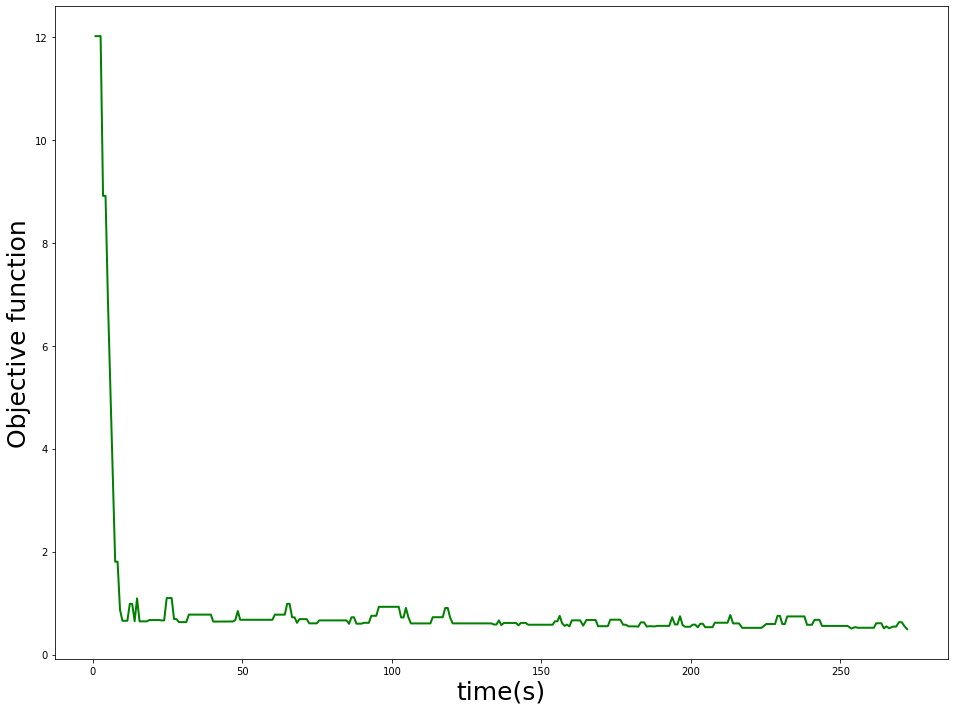

In [18]:
fig = plt.figure(figsize=(16, 12))
plt.plot(time_ssg,loss_ssg, label=("stochastic subgradient"), linewidth=2.0, color ="green")
plt.xlabel("time(s)", fontsize=25)
plt.ylabel("Objective function", fontsize=25)
plt.savefig('stochastic_subgradient.png')

In [20]:
# 1) Stochastic sub-gradient
import random

lambda_ = 1
def get_regression_loss(A,x,b):
    bs = hstack([b]*A.shape[1])
    t = -1*b.multiply((A.dot(x)))  #-bi(ai.x +b)
    # exp(t), element wise
    e=t.expm1()
    # log(1+exp(t)), element wise
    deno = (csr_matrix(np.ones(shape=(b.shape[0],b.shape[1])),shape=(b.shape[0],b.shape[1])) + e).log1p()
    loss = lambda_* norm(x.toarray(),2)**2 + deno.mean(0)[0,0]
    return loss

# get_regression_loss(A_training,x_,b_training)

def get_gradient_sto_grad(A,x,b):
    bs = hstack([b]*A.shape[1])
    t = -1*b.multiply((A.dot(x)))  #-bi(ai.x +b)
    # exp(t), element wise
    nume=t.expm1()
    # log(1+exp(t)), element wise
    deno = (csr_matrix(np.ones(shape=(b.shape[0],b.shape[1])),shape=(b.shape[0],b.shape[1])) + nume)
    coef = csr_matrix(nume/deno)
    coefs = hstack([coef]*b.shape[1])

    _biai = -1*bs.multiply(A)
    g = _biai.multiply(coefs)
    # next, need to sum by column and divide by n
    grad = csr_matrix(g.mean(0)).transpose()
    print(grad)
    return grad
    
    
# print(get_gradient_sto_grad(A_training,x_,b_training))
    
def stochastic_gradient(A,x,b,max_iteration,epsilon,record_loss=False):
    count = 1000
    print('stochastic_subgradient, question2')
    loss_list = []
    time_list = []
    st = time.time()
    loss = epsilon # initial a size to start 
    while count < max_iteration and loss >= epsilon:
        loss = get_regression_loss(A,x,b)
        grad = get_gradient_sto_grad(A,x,b)
#         step_size = 1/math.log(count,2) 
        step_size = 1/count
        time_diff = time.time()-st
        x = x - step_size*grad
        print('count %d\t stepsize %.4f \t time %.4f \t hinge_loss %.4f'%(count, step_size, time_diff,loss))
        count +=1
        if record_loss:
            loss_list.append(loss)
            time_list.append(time_diff)
    if record_loss:
        return x,count,loss_list,time_list
    return x,count,hinge_loss


x_s,count_sgd,loss_sgd,time_sgd= stochastic_gradient(A_training,x_,b_training, 1000,0.5,True)

stochastic_subgradient, question2


In [196]:
# get_gradient(A_,x_,b_,10).toarray()  

In [44]:
def gd(A,x,b):
    b = b.toarray()
#     x = np.array(x)
    A_dot_x = (A.dot(x).toarray())
    print(type(A),type(b),type(x),type(A_dot_x))
    print(A.shape,b.shape,x.shape,A_dot_x.shape)
    e = np.exp(-1*A_dot_x*b)
    coef = e/(1+e)
    biai = -1*A.multiply(b).mean(0)
    print(coef.shape,biai.shape)
    
    
    print('finish')

    
#     t = np.exp(-1*np.array(A.dot(x)) * b)
#     print(t.shape)
#     # exp(t), element wise
#     nume=t.expm1()
#     # log(1+exp(t)), element wise
#     deno = (csr_matrix(np.ones(shape=(b.shape[0],b.shape[1])),shape=(b.shape[0],b.shape[1])) + nume)
#     coef = csr_matrix(nume/deno)
#     coefs = hstack([coef]*b.shape[1])

#     _biai = -1*bs.multiply(A)
#     g = _biai.multiply(coefs)
#     # next, need to sum by column and divide by n
#     grad = csr_matrix(g.mean(0)).transpose()
#     print(grad)
#     return grad
    
print(A_training.shape, x_.shape, b_training.shape)
gd(A_training,x_,b_training)


(29304, 124) (124, 1) (29304, 1)
<class 'scipy.sparse.csr.csr_matrix'> <class 'numpy.ndarray'> <class 'scipy.sparse.csr.csr_matrix'> <class 'numpy.ndarray'>
(29304, 124) (29304, 1) (124, 1) (29304, 1)
(29304, 1) (1, 124)
finish
